In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [9]:
#img = plt.imread('scene2.png')
#img = plt.imread('portrait.png')
#img = plt.imread('portrait_lowcontrast.png')

img = plt.imread('scene3.png')
#img = plt.imread('popoy.jpg')
#img = plt.imread('beach.png')
#img= img/255

R = img[:,:,0]*255
G = img[:,:,1]*255
B = img[:,:,2]*255

#

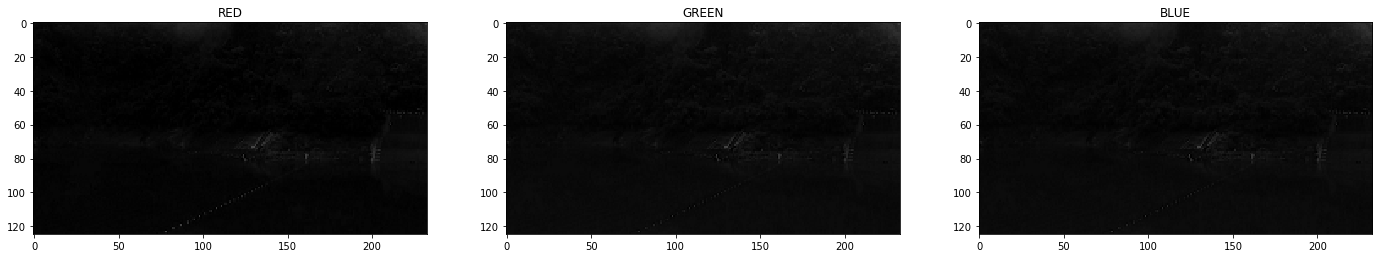

In [10]:
plt.figure(figsize=[24,10])
plt.subplot(1,3,1)
plt.title('RED')
plt.imshow(R, cmap = 'gray', vmin = 0, vmax = 255)
plt.subplot(1,3,2)
plt.title('GREEN')
plt.imshow(G, cmap = 'gray',  vmin = 0, vmax = 255)
plt.subplot(1,3,3)
plt.title('BLUE')
plt.imshow(G, cmap = 'gray',  vmin = 0, vmax = 255)


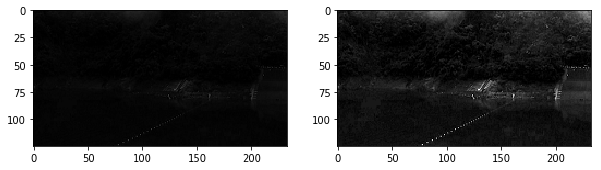

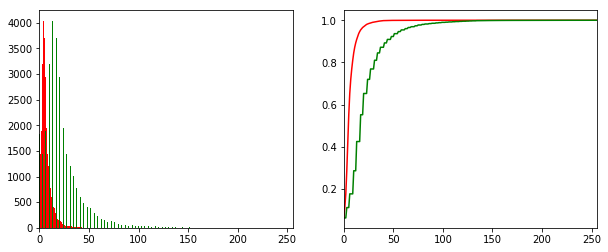

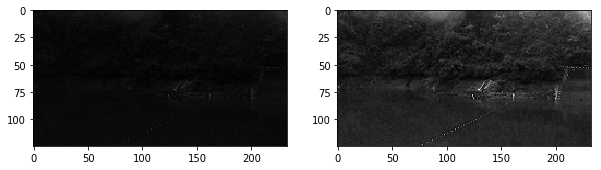

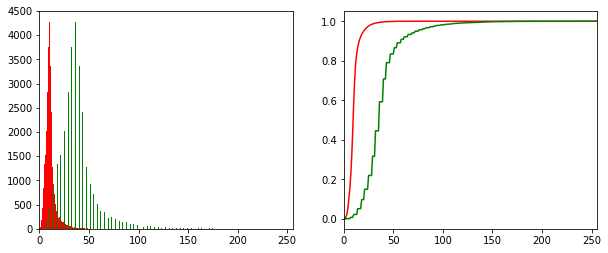

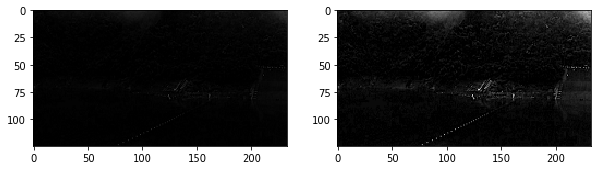

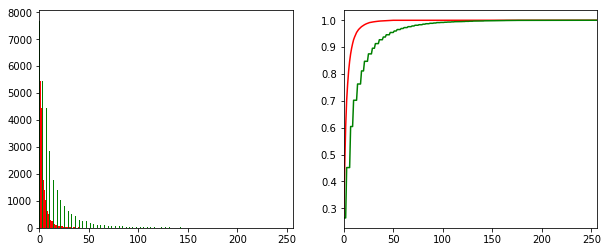

In [11]:
def Contrast_Stretching(gray):
    Imin = np.amin(gray)
    Imax = np.amax(gray)
    contrast_stretched = (gray-Imin)/(Imax-Imin)
    contrast_stretched = contrast_stretched*255
    contrast_stretched =  contrast_stretched.astype(int)

    gray = gray
    plt.figure(figsize=[10,10])
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)
    plt.subplot(1,2,2)
    plt.imshow(contrast_stretched, cmap='gray', vmin = 0, vmax = 255)
    plt.show()
    
    hist,bins = np.histogram(gray.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf/cdf.max() #* float(hist.max()) / cdf.max()
    
    hist_,bins_ = np.histogram(contrast_stretched.flatten(),256,[0,256])
    cdf_ = hist_.cumsum()
    cdf_normalized_ = cdf_/cdf_.max()
    
    plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    plt.hist(gray.flatten(),256,[0,256], color = 'r')
    plt.hist(contrast_stretched.flatten(),256,[0,256], color = 'g')
    plt.xlim(0,256)
    plt.subplot(1,2,2)
    plt.plot(cdf_normalized, 'r')
    plt.plot(cdf_normalized_, 'g')
    plt.xlim(0,256)
    plt.show()
    
    return contrast_stretched#, cdf_normalized

R_stretched = Contrast_Stretching(R)
G_stretched = Contrast_Stretching(G)
B_stretched = Contrast_Stretching(B)

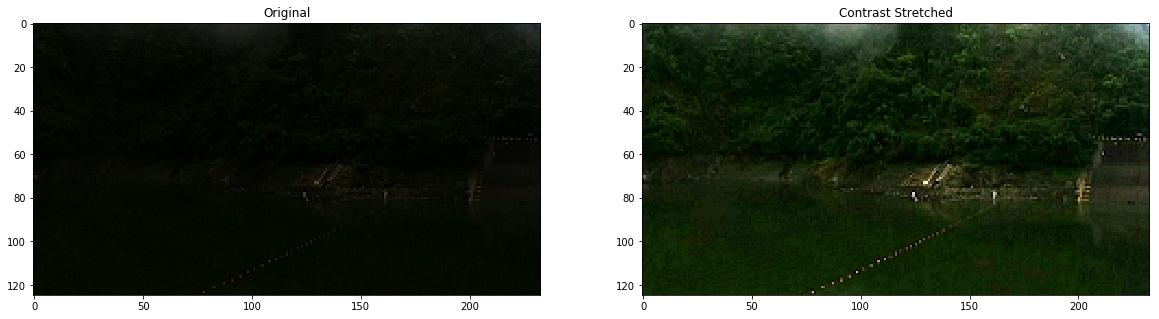

In [12]:
img_stretched = np.zeros(shape = [np.shape(img)[0],np.shape(img)[1], 3])
img_stretched[:,:,0] = R_stretched
img_stretched[:,:,1] = G_stretched
img_stretched[:,:,2] = B_stretched

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)

plt.title('Original')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Contrast Stretched')
plt.imshow(img_stretched/255)

In [17]:
def Gray_World(gray):
    ave = np.mean(gray)
    AVE = gray/ave
    AVE = (AVE/np.max(AVE))*255
    
    plt.figure(figsize=[10,10])
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)
    plt.subplot(1,2,2)
    plt.imshow(AVE, cmap='gray', vmin = 0, vmax = 255)
    plt.show()
    
    return AVE

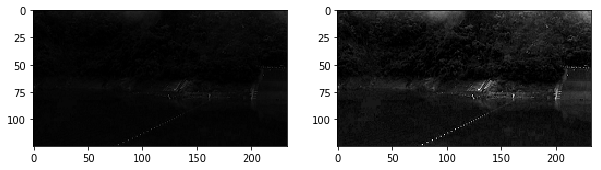

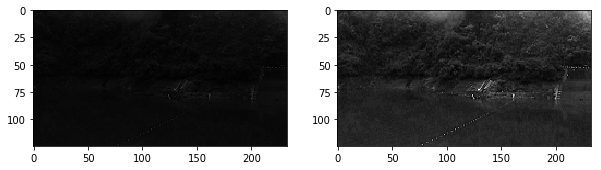

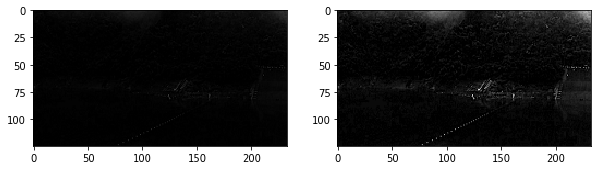

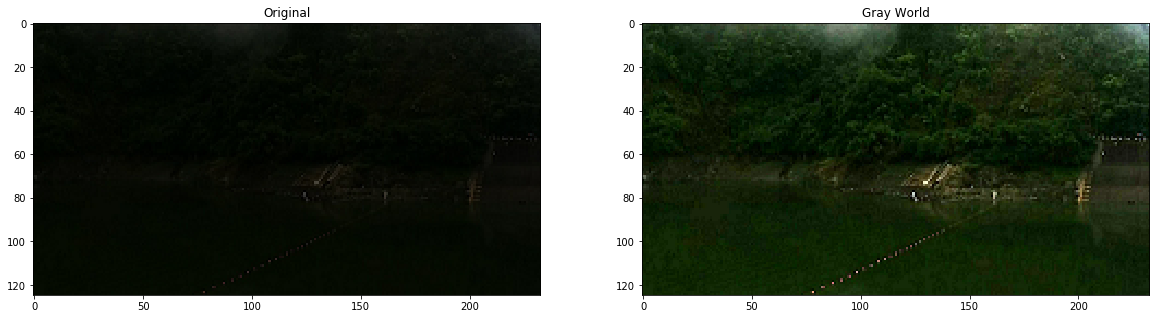

In [20]:
#img = plt.imread('scene2.png')
#img = plt.imread('portrait.png')
#img = plt.imread('portrait_lowcontrast.png')
img = plt.imread('scene3.png')
#img = plt.imread('beach.png')


R = img[:,:,0]*255
G = img[:,:,1]*255
B = img[:,:,2]*255

R_gray = Gray_World(R)
G_gray = Gray_World(G)
B_gray = Gray_World(B)

img_grayworld = np.zeros(shape = [np.shape(img)[0],np.shape(img)[1], 3])
img_grayworld[:,:,0] = R_gray
img_grayworld[:,:,1] = G_gray
img_grayworld[:,:,2] = B_gray

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Gray World')
plt.imshow((img_grayworld/255))#/np.amax(img_grayworld)))


In [8]:
img_grayworld

array([[[1.31483817, 1.37699461, 1.23148012],
        [1.31483817, 1.37699461, 1.23148012],
        [1.31483817, 1.37699461, 1.23148012],
        ...,
        [0.82177389, 0.91799647, 1.29989564],
        [0.82177389, 0.91799647, 1.29989564],
        [0.82177389, 0.91799647, 1.29989564]],

       [[1.31483817, 1.37699461, 1.23148012],
        [1.31483817, 1.37699461, 1.23148012],
        [1.31483817, 1.37699461, 1.23148012],
        ...,
        [0.82177389, 0.91799647, 1.29989564],
        [0.82177389, 0.91799647, 1.29989564],
        [0.82177389, 0.91799647, 1.29989564]],

       [[1.31483817, 1.37699461, 1.23148012],
        [1.31483817, 1.37699461, 1.23148012],
        [1.31483817, 1.37699461, 1.23148012],
        ...,
        [0.82177389, 0.91799647, 1.29989564],
        [0.82177389, 0.91799647, 1.29989564],
        [0.82177389, 0.91799647, 1.29989564]],

       ...,

       [[0.82177389, 0.76499701, 0.54732448],
        [0.82177389, 0.76499701, 0.54732448],
        [0.82177389, 0

In [16]:
img_grayworld/np.amax(img_grayworld)

array([[[0.07614314, 0.06935493, 0.12857144],
        [0.09898609, 0.08322591, 0.15714286],
        [0.07614314, 0.06935493, 0.12857144],
        ...,
        [0.27411533, 0.19881745, 0.64285714],
        [0.31980121, 0.23580674, 0.71428571],
        [0.42640162, 0.29129069, 0.94285712]],

       [[0.08375746, 0.07397859, 0.11428572],
        [0.09898609, 0.08322591, 0.15714286],
        [0.06852883, 0.06473127, 0.11428572],
        ...,
        [0.23604374, 0.17569915, 0.55714288],
        [0.29695826, 0.22655942, 0.65714289],
        [0.46447318, 0.30516168, 1.        ]],

       [[0.08375746, 0.07397859, 0.14285714],
        [0.06852883, 0.06473127, 0.12857144],
        [0.06091451, 0.0601076 , 0.1       ],
        ...,
        [0.23604374, 0.16645183, 0.57142857],
        [0.28172965, 0.19419379, 0.64285714],
        [0.29695826, 0.19881745, 0.65714289]],

       ...,

       [[0.04568589, 0.05548394, 0.02857143],
        [0.04568589, 0.05548394, 0.02857143],
        [0.04568589, 0

In [128]:
img = plt.imread('portrait.png')


In [169]:

def White(img):
    R = img[:,:,0]*255
    G = img[:,:,1]*255
    B = img[:,:,2]*255
    
    R_wb = 255*(R/np.amax(R))
    G_wb = 255*(G/np.amax(G))
    B_wb = 255*(B/np.amax(B))
    
    #white = img[282, 326]
    
#     wb = np.zeros(shape = [np.shape(img)[0],np.shape(img)[1], 3])
# #     wb[:,:,0] = ((R/white[0])*255).astype(int)
# #     wb[:,:,1] = ((G/white[1])*255).astype(int)
# #     wb[:,:,2] = ((B/white[2])*255).astype(int)

#     wb[:,:,0] = R_wb #.astype(int)
#     wb[:,:,1] = G_wb#.astype(int)
#     wb[:,:,2] = B_wb#.astype(int)

    
    
    
    return R_wb, G_wb, B_wb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


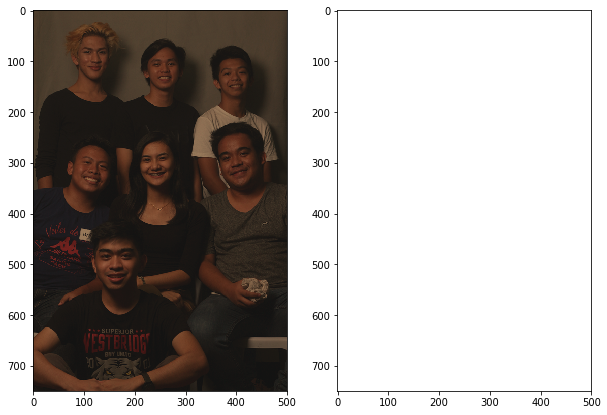

In [176]:
R_wb, G_wb, B_wb = White(img)
wb = np.zeros(shape = [np.shape(img)[0],np.shape(img)[1], 3])
wb[:,:,0] = R_wb.astype(int)
wb[:,:,1] = G_wb.astype(int)
wb[:,:,2] = B_wb.astype(int)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img, vmin = 0, vmax = 255)
plt.subplot(1,2,2)
plt.imshow(wb, vmin = 0, vmax = 255)
#plt.show()
plt.savefig("wb.png")

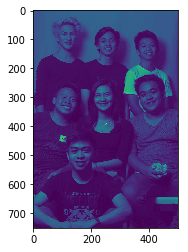

In [168]:
plt.imshow(wb[:,:,1])

In [166]:
np.amin(wb)

26.686046600341797

In [59]:
white

array([0.08235294, 0.07450981, 0.07058824, 1.        ], dtype=float32)